In [1]:
import numpy as np
import dash
import matplotlib.pyplot as plt

# The Linear Model

First, we assume the model
$$
    y = w^Tx + b,
$$
where $w$ contains the linear coefficients and $b$ is the bias.

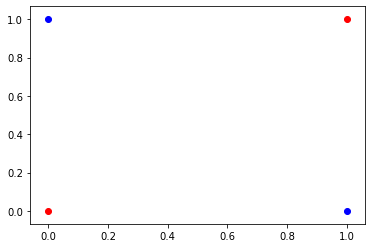

In [26]:
X_with_bias = np.asarray([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.asarray([[0],[1],[1],[0]])

# Split the data for visualizing the two groups
group1 = np.asarray([[0,0],[1,1]])
group2 = np.asarray([[0,1],[1,0]])

fig, ax = plt.subplots()

ax.scatter(group1[:,0], group1[:,1], color = 'red');
ax.scatter(group2[:,0], group2[:,1], color = 'blue');

In [45]:
inverse_step = np.linalg.inv(np.dot(X_with_bias.T, X_with_bias))
w = inverse_step.dot(X_with_bias.T).dot(y)

# The first coefficient of 'w' is the bias in the linear model
w

array([[0.5],
       [0. ],
       [0. ]])

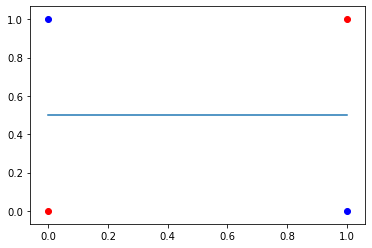

In [46]:
# Plot the result

x = np.linspace(0,1,21)
model_output = w[0]*np.ones(21)

fig, ax = plt.subplots()

ax.scatter(group1[:,0], group1[:,1], color = 'red');
ax.scatter(group2[:,0], group2[:,1], color = 'blue');
ax.plot(x, model_output);

# The Single Layer NN

We now use the model specified by
$$
    y = w^T\max \{0, W^Tx + c \} + b
$$

In [74]:
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
W = np.ones((2,2))

w = np.asarray([[1],[-2]])
c = np.asarray([[0,-1],[0,-1],[0,-1],[0,-1]])

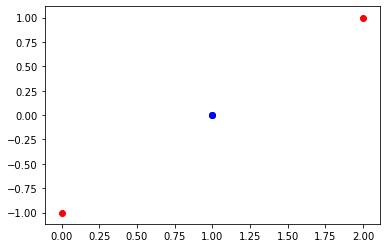

In [75]:
# Data with affine transformation applied
Z = np.dot(X,W) + c

group1_transformed = np.asarray([Z[0,:], Z[-1,:]])
group2_transformed = np.asarray([Z[1,:], Z[2,:]])

fig, ax = plt.subplots()

ax.scatter(group1_transformed[:,0], group1_transformed[:,1], color = 'red');
ax.scatter(group2_transformed[:,0], group2_transformed[:,1], color = 'blue');

The two points from group2 have been collapsed to a single point. Now I'll apply the ReLU function and multiply by the output weight vector $w$.

In [80]:
def relu(x):
    """ Find max(0, xi) for every xi in x. """
    
    return np.asarray([[np.max([0, i]) for i in row] for row in x])

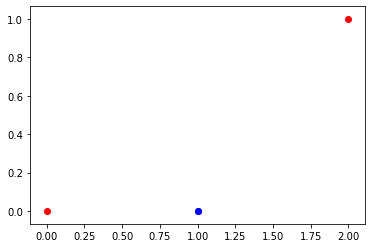

In [86]:
# Plot the result after relu applied
Z_relu = relu(Z)

group1_relu = np.asarray([Z_relu[0,:], Z_relu[-1,:]])
group2_relu = np.asarray([Z_relu[1,:], Z_relu[2,:]])

fig, ax = plt.subplots()

ax.scatter(group1_relu[:,0], group1_relu[:,1], color = 'red');
ax.scatter(group2_relu[:,0], group2_relu[:,1], color = 'blue');

In [85]:
output = np.dot(relu(Z), w)
output

array([[0.],
       [1.],
       [1.],
       [0.]])